## k-means

Pour tenter de résoudre notre problématique de cluestering nous pouvons utiliser l'algorithme de cluestering k-means.
Il permet d’analyser un jeu de données caractérisées par un ensemble de descripteurs, afin de regrouper les données “similaires” en groupes (ou clusters). Il minimise la somme des variances intra-cluster.

In [1]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [2]:
df = pd.read_csv('./RFM_dataset.csv')
df

,customer_id,Recency,Frequency,Monetary
0,9ef432eb6251297304e76186b10a928d,26.906558,2,1.488100
1,b0830fb4747a6c6d20dea0b8c802d7ef,14.017321,1,1.601216
2,41ce2a54c0b03bf3443c3d931a367089,12.924112,1,1.647432
3,f88197465ea7920adcdbec7375364d82,25.385337,1,1.457031
4,8ab97904e6daea8866dbdbc4fb7aad2c,22.215955,1,1.220373
...,...,...,...,...
94978,39bd1228ee8140590ac3aca26f2dfe00,32.588038,1,1.494089
94979,1fca14ff2861355f6e5f14306ff977a7,22.491884,1,1.663569
94980,1aa71eb042121263aafbe80c1b562c9c,28.001795,1,1.723809
94981,b331b74b18dc79bcdf6532d51e1637c1,23.592444,1,1.686544


In [3]:
df_sample = df.sample(10000, replace=False)
df_sample.shape

(10000, 4)

In [4]:
X = df_sample.drop('customer_id', axis=1).values
y = df_sample['customer_id'].values
print(X.shape)
print(y.shape)

(10000, 3)
(10000,)


In [5]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(10000, 3)


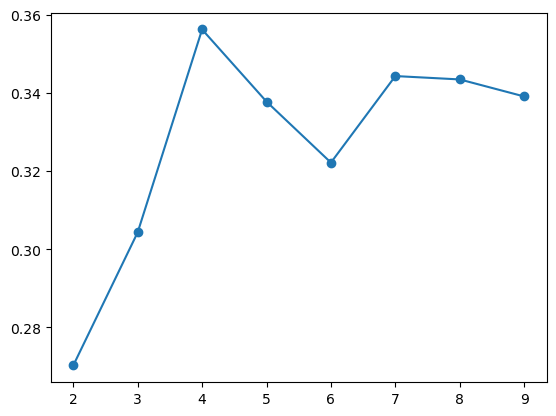

In [6]:
from sklearn import cluster, metrics

silhouettes = []
for num_clusters in range (2, 10): #on regarde de 2 à 10 clusters
    cls = cluster.KMeans(n_clusters=num_clusters, n_init=1, init='random')
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')

In [7]:
from sklearn import decomposition

X = df.drop('customer_id', axis=1).values
X_norm = preprocessing.scale(X)

pca = decomposition.PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm)

[0.38396798 0.71617379]


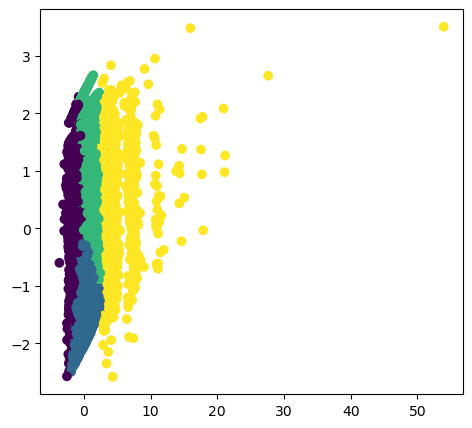

In [8]:
fig = plt.figure(figsize=(12, 5))

cls = cluster.KMeans(n_clusters=4)
cls.fit(X_norm)
ax = fig.add_subplot(121)#1 figure en ordonné, 2 figures en abscisse et on s'occupe de la première figure
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls.labels_)#on observe la première et la deuxième composante

Pour déterminer le nombre optimal de cluster à utiliser pour notre algorithme k-means nous utilisons la méthode du coude (Elbow Method), Elle consiste à observer la variation de l'inertie (somme des carrés des distances entre les points et les centroïdes) en fonction du nombre de clusters.

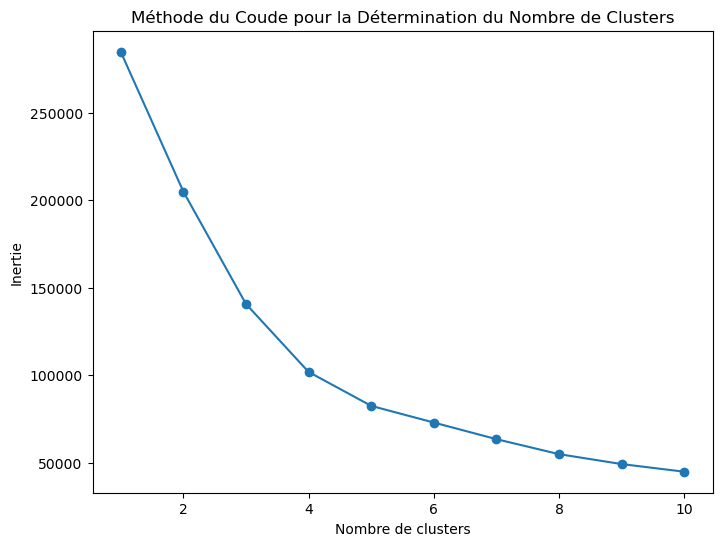

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_Y = df.drop('customer_id', axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_Y)

inertis = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    inertis.append(kmeans.inertia_)

# Tracé de la courbe de l'inertie
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertis, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour la Détermination du Nombre de Clusters')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_
df

,customer_id,Recency,Frequency,Monetary,Cluster
0,9ef432eb6251297304e76186b10a928d,26.906558,2,1.488100,2
1,b0830fb4747a6c6d20dea0b8c802d7ef,14.017321,1,1.601216,0
2,41ce2a54c0b03bf3443c3d931a367089,12.924112,1,1.647432,0
3,f88197465ea7920adcdbec7375364d82,25.385337,1,1.457031,3
4,8ab97904e6daea8866dbdbc4fb7aad2c,22.215955,1,1.220373,3
...,...,...,...,...,...
94978,39bd1228ee8140590ac3aca26f2dfe00,32.588038,1,1.494089,3
94979,1fca14ff2861355f6e5f14306ff977a7,22.491884,1,1.663569,1
94980,1aa71eb042121263aafbe80c1b562c9c,28.001795,1,1.723809,1
94981,b331b74b18dc79bcdf6532d51e1637c1,23.592444,1,1.686544,1


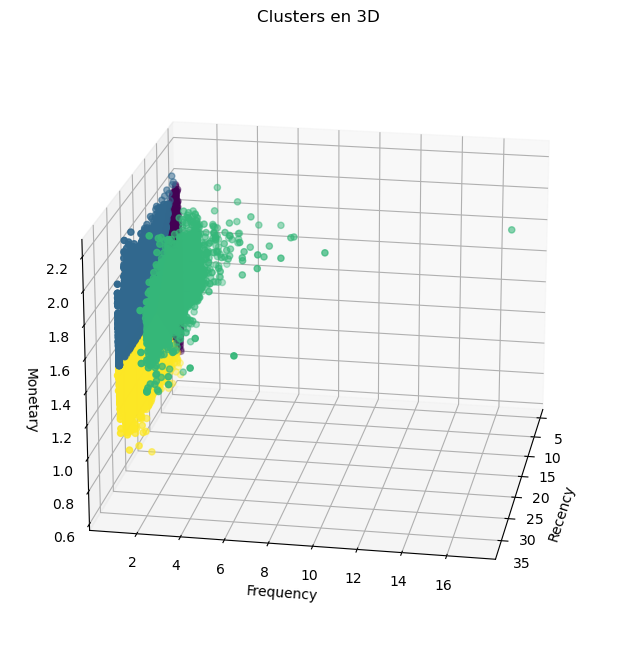

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()

Nous pouvons également utiliser le coefficient de distortion pour obtenir le k le plus adapté à notre modèle. Connu sous le nom d'inertie intra-classe, c'est une mesure qui évalue la compacité des clusters obtenus lors de l'application d'un algorithme de clustering comme K-means. Il mesure la somme des carrés des distances euclidiennes entre chaque point de données et le centroïde de son cluster associé.

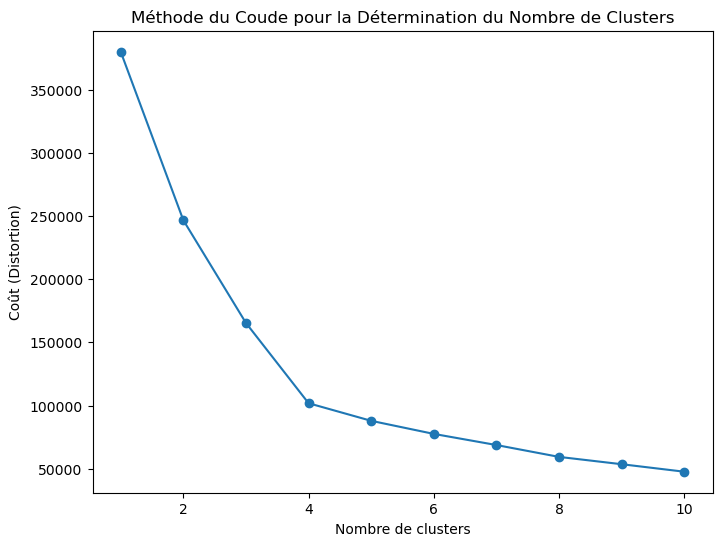

In [12]:
df_X = df.drop('customer_id', axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_X)

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût (Distortion)')
plt.title("Courbe d'inertie")
plt.show()

In [22]:
df_cluster = df.copy()
df_cluster.drop(columns={'Recency', 'Frequency', 'Monetary'}, inplace=True)
df_cluster

,customer_id,Cluster
0,9ef432eb6251297304e76186b10a928d,2
1,b0830fb4747a6c6d20dea0b8c802d7ef,0
2,41ce2a54c0b03bf3443c3d931a367089,0
3,f88197465ea7920adcdbec7375364d82,3
4,8ab97904e6daea8866dbdbc4fb7aad2c,3
...,...,...
94978,39bd1228ee8140590ac3aca26f2dfe00,3
94979,1fca14ff2861355f6e5f14306ff977a7,1
94980,1aa71eb042121263aafbe80c1b562c9c,1
94981,b331b74b18dc79bcdf6532d51e1637c1,1


In [23]:
cluster_dataset = 'clustert_dataset.csv'
df_cluster.to_csv(cluster_dataset, index=False)